In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [ ]:
df = pd.read_csv('/content/epa-sea-level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


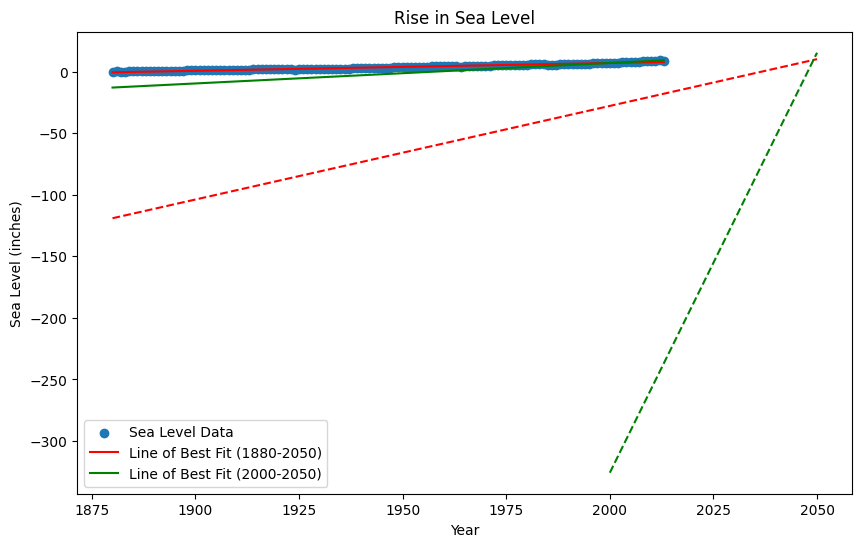

In [ ]:
df['Year'] = pd.to_numeric(df['Year'])

plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label='Sea Level Data')
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])

# Generate line of best fit for all data
plt.plot(df['Year'], slope * df['Year'] + intercept, color='red', label='Line of Best Fit (1880-2050)')

df_recent = df[df['Year'] >= 2000]
slope_recent, intercept_recent, _, _, _ = linregress(df_recent['Year'], df_recent['CSIRO Adjusted Sea Level'])

plt.plot(df['Year'], slope_recent * df['Year'] + intercept_recent, color='green', label='Line of Best Fit (2000-2050)')

plt.plot([df['Year'].min(), 2050], [intercept, slope * 2050 + intercept], color='red', linestyle='dashed')
plt.plot([2000, 2050], [intercept_recent, slope_recent * 2050 + intercept_recent], color='green', linestyle='dashed')

plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')

plt.legend()

plt.savefig('sea_level_plot.png')
plt.show()